### Tuning Process



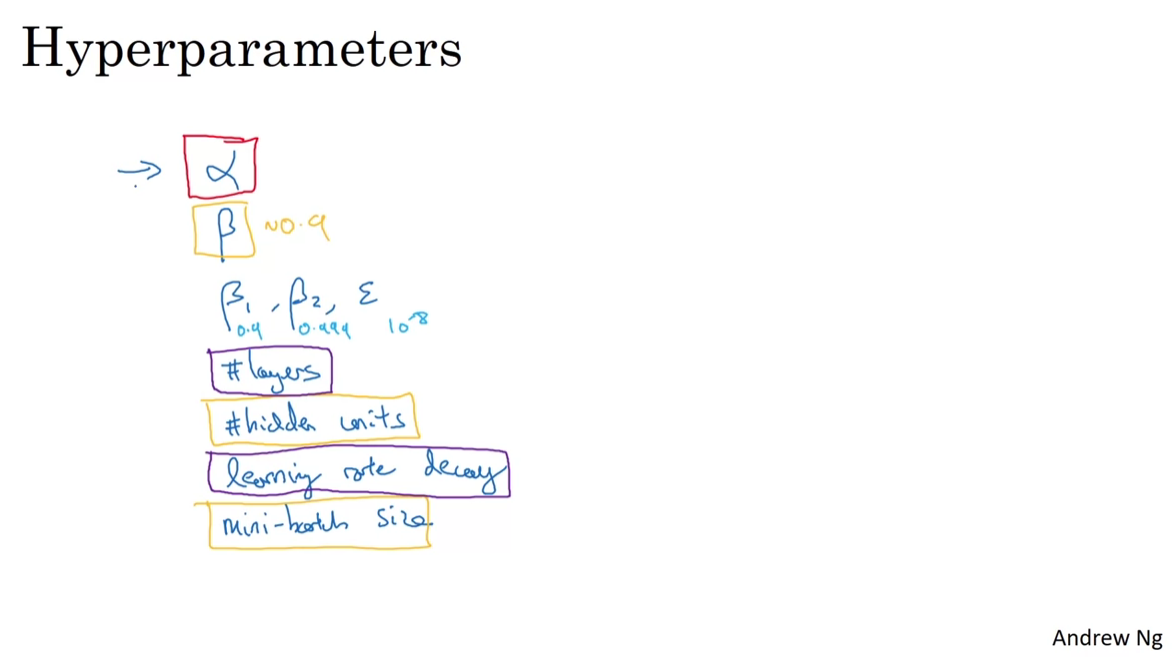

Trong hình trên là các siêu tham số với độ quan trọng (Đỏ là quan trọng nhất, cam là quan trọng thứ 2, tím là quan trọng thứ 3). Các siêu tham số này sẽ có một ảnh hưởng nhất định trên kết quả của quá trình tuning.

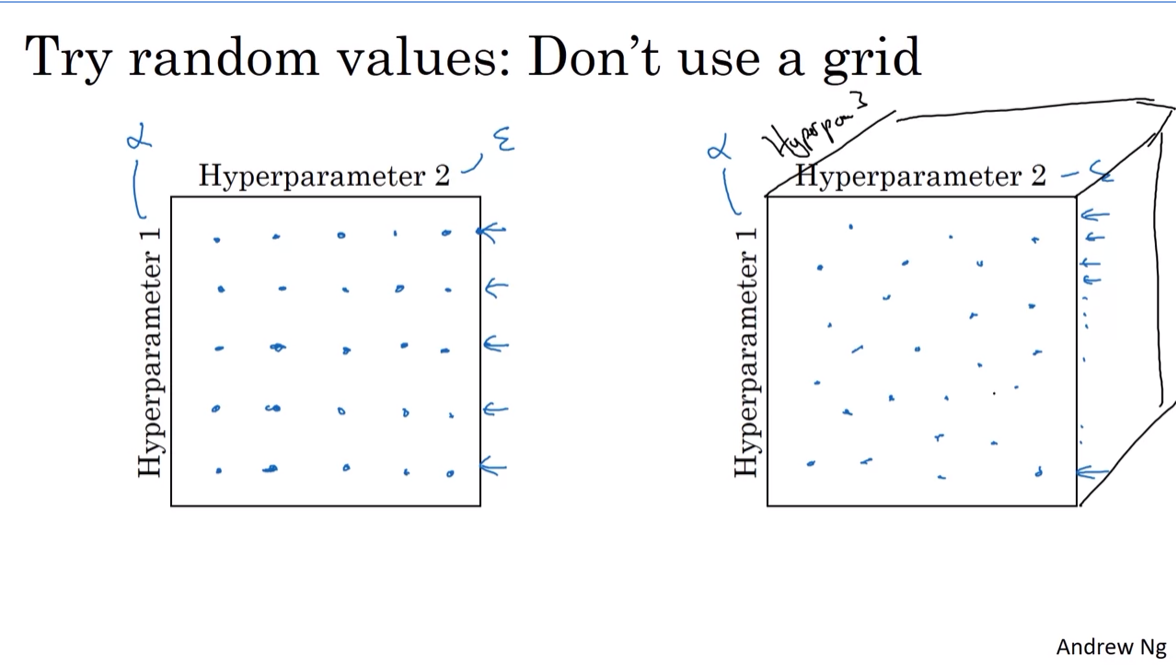

Khi ta thử nghiệm các tham số mới, ta sẽ hạn chế việc chọn parameter theo dạng Grid, theo như ví dụ trên, với 5 bộ giá trị tham số trong grid, ta sẽ chỉ nhận được 5 kết quả khác nhau với mỗi một bộ tham số. Điều này không đủ để đánh giá tốt các tham số. Vì vậy, ta sẽ sử dụng Random Search, với số lượng lớn các bộ tham số, ta sẽ nhận được nhiều kết quả hơn, từ đó đánh giá được tốt hơn.

Ta có thể sử dụng các thuật toán tìm kiếm được tích hợp trong scikit-learn như: GridSearch, RandomizedSearch, Bayesian Optimization, Optuna, Hyperopt, ...

Ngoài ra ta có thể dùng Bayesian Optimization nhưng nó sẽ yêu cầu nhiều về mặt logic và tính toán hơn.

### Sử dụng một thang đo thích hợp để chọn các hyperparameters

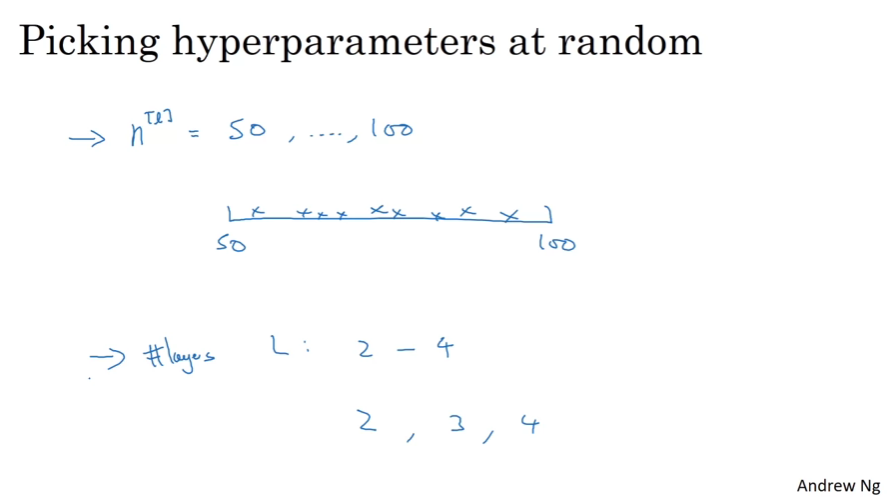

- Giả sử rằng ta đang tìm số lượng hidden unit trong một layer, chọn ra mộtgiá trị ngẫu nhiên trong khoảng từ 50 tới 100
- Hoặc khi ta đang tìm learning rate, ta sẽ chọn giá trị trong khoảng từ 0.0001 tới 0.1

Nhưng hầu như các cách chọn tham số ở trên hầu hết không hề tốt hoàn toàn.

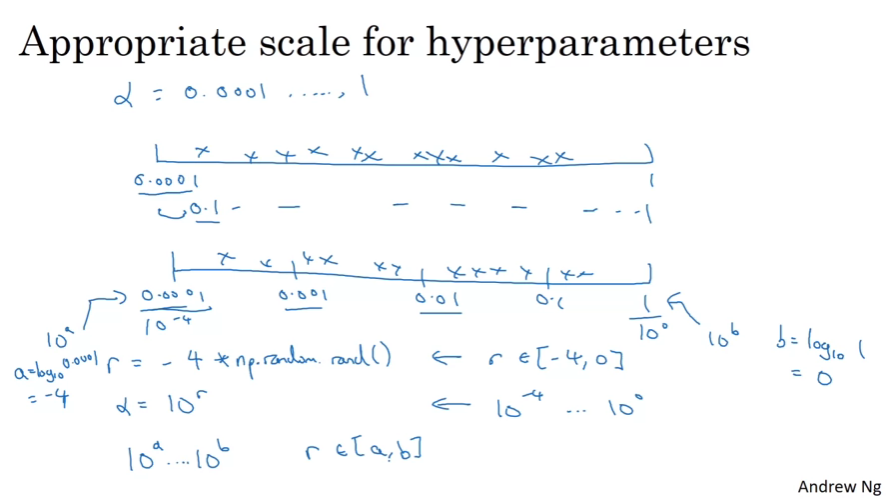

Nếu ta chọn learning rate trong khoảng từ 0.0001 cho đến 1, với các tham số chọn ngẫu nhiên chủ yếu nằm 90% trong khoảng từ 0.1 cho đến 1 và 10% nằm ở 0.0001 cho đến 0.1. Điều này là không hợp lý và có thể khiến ta bỏ lỡ các giá trị tốt nhất.

=> Vì vậy thay vào đó ta sẽ sử dụng thang đo Log, thay vì sử dụng than đo tuyến tính như hình trên và chọn ra các tham số trong khoảng đó.

Thế còn với các tham số của Exponentially Weighted Averages thì sao?

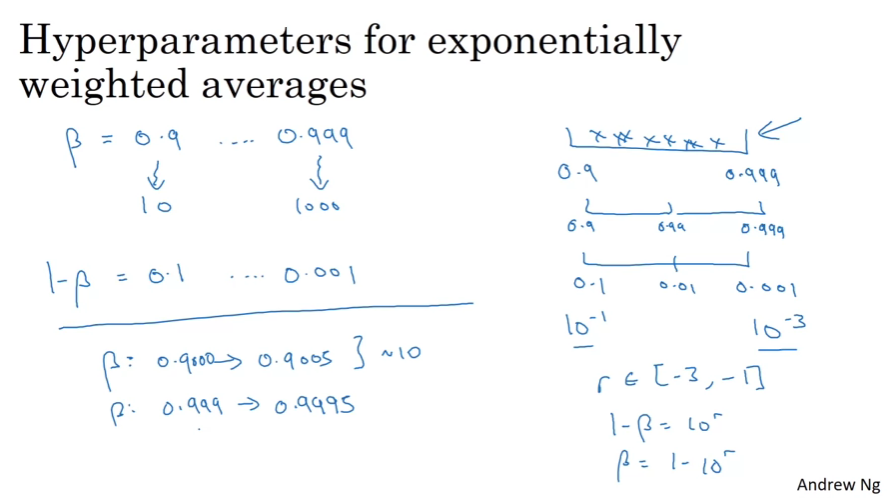

### Hyperparameters Tuning in Practice: Pandas vs. Caviar

Ta có 2 cách chính để kiểm soát việc sử dụng tham số:
- Pandas: Thử nghiệm mô hình với từng bộ tham số một
- Cavier: Thử nghiệm nhiều mô hình với nhiều bộ tham số khác nhau cùng một lúc

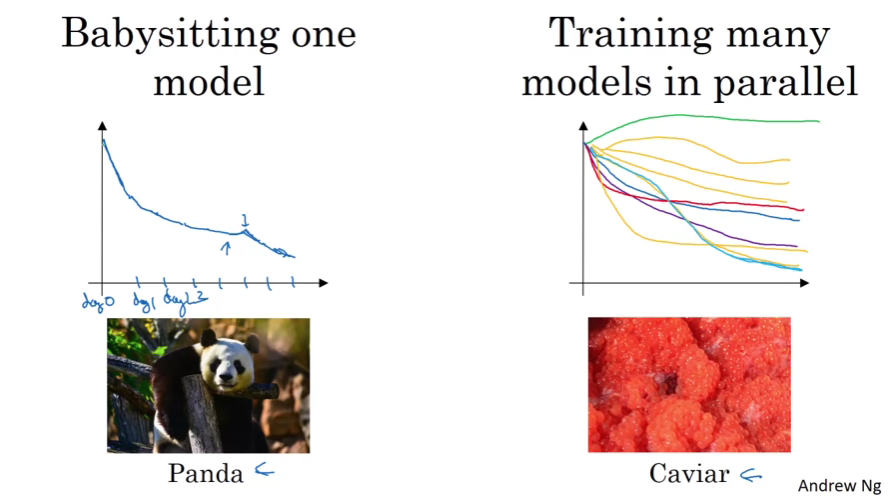

### Batch Normalization

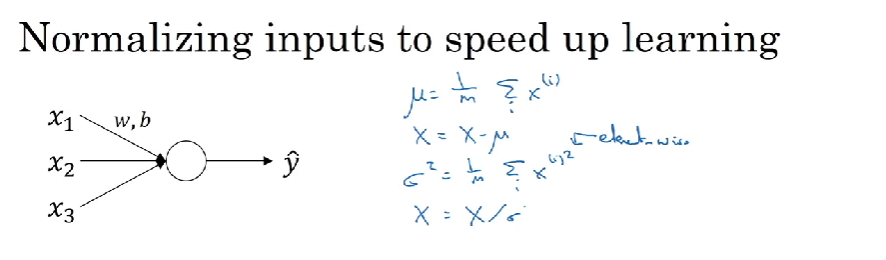

Batch Normalization cho một mô hình, cụ thể như LR, giúp tăng tốc độ học và giảm độ phức tạp của mô hình. Nhưng nó cũng có thể làm giảm độ chính xác của mô hình.

Nó bao gồm chuẩn hoá các vectors của lớp ẩn (hidden layers) sử dụng trung bình và phương sai (mean và variance) của batch hiện tại. Bước chuẩn hoá có thể được áp dụng ngay trước hoặc ngay sau một hàm phi tuyến tính.

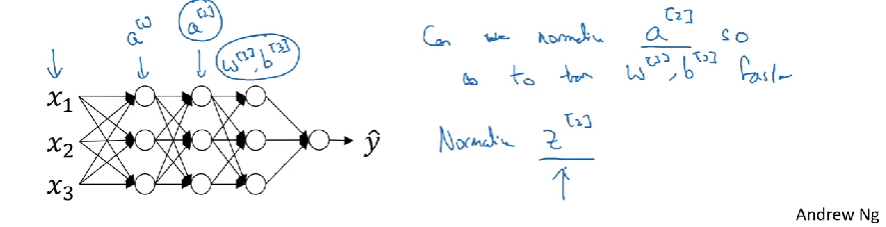

Còn đối với Deep Neural Network, ngoài việc chỉ nhập vào các dữ liệu như input x, w, b thì ta còn có đa biến cho mỗi layer, như $w_1, w_2, ..., w_n$, $b_1, b_2, ..., b_n$, hay $z_1, ...,z_n$ cho các activation layer. Cho nên việc dùng Batch normalization cho DNN sẽ tăng tốc độ training và ổn định hơn.

Với mỗi lớp ẩn (hidden layer), BN chuyển đổi tín hiệu như sau:

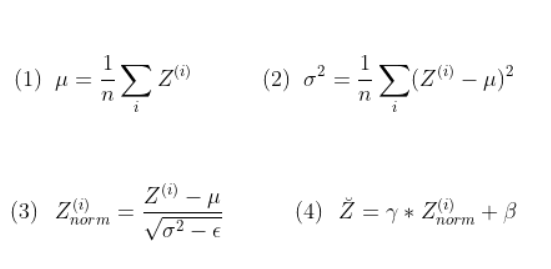

Lớp BN đầu tiên xác định trung bình $\mu$ và phương sai $\sigma^2$ của các kích hoạt (activation) trong batch, sử dụng công thức (1) và (2). Tiếp theo, nó chuẩn hoá vector $Z(i)$ với công thức (3). Thế là, tất cả các output đều được tuân theo phân phối chuẩn trong batch đó. (𝜀 là một hằng số giúp duy trì [numerical stablity](https://en.wikipedia.org/wiki/Numerical_stability))

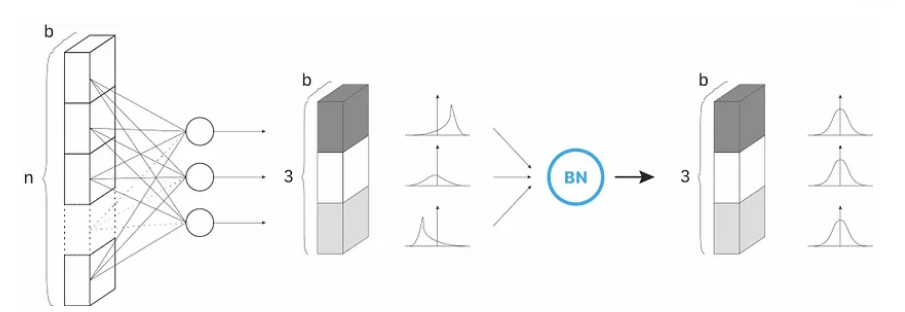

Ở bước cuối, BN tính output $\hat{Z}(i)$ bằng cách scale và shift output chuẩn hoá $Z(i)$ với 2 tham số $\gamma$ và $\beta$. Các tham số này được học trong quá trình training với:
- $\gamma$ là scale parameter giúp điều chỉnh phương sai của output
- $\beta$ là shift parameter giúp điều chỉnh trung bình của output

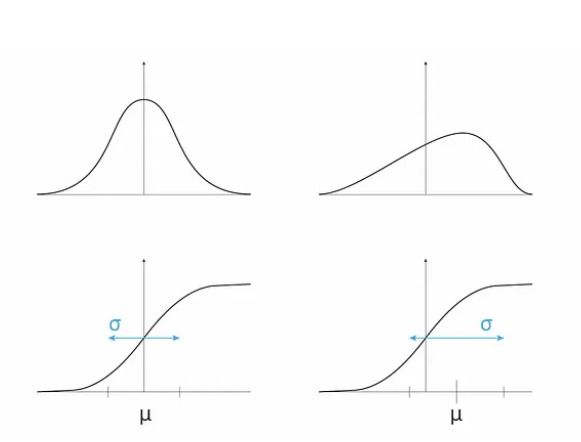

Với mỗi lần lặp, network sẽ tính toán trung bình $\mu$ và phương sai $\sigma^2$ cho batch hiện tại. Sau đó nó huấn luyện $\gamma$ và $\beta$ bằng gradient descent, sử dụng Đường trung bình động hàm mũ (Exponential Moving Average/EMA) giúp ưu tiên hơn cho những iterations gần nhất.

Khác với khi huấn luyện, chúng ta có thể không có batch đầy đủ để đưa vào mô hình.

Để giải quyết vấn đề này, chúng ta tính (𝜇_pop , σ_pop) với:
- 𝜇_pop : ước lượng giá trị trung bình cho toàn bộ quần thể (population) được nghiên cứu
- σ_pop : ước lượng giá trị độ lệch chuẩn cho toàn bộ quần thể (population) được nghiên cứu

Hai giá trị này được tính toán sử dụng các giá trị (𝜇_batch , σ_batch) được tính trong quá trình huấn luyện, và input thẳng vào công thức (3) ở trên, bỏ qua bước (1) và (2). Bước (1) và (2) chỉ chạy trong iter đầu tiên.

Trong thực tế, chúng ta xem BN như một lớp bình thường, như là một perceptron, convultional layer, hay một hàm kích hoạt hoặc một lớp dropout.

Các nền tảng thông dụng cũng đã triển khai BN như một layer:
- Pytorch: torch.nn.BatchNorm1d, torch.nn.BatchNorm2d, torch.nn.BatchNorm3d

Tất cả các cách triển khai của BN đều cho phép bạn cấu hình tham số một cách độc lập. Tuy nhiên, kích cỡ của vector đầu vào là quan trọng nhất. Nó nên được thiết lập bằng:
- Số nơ-ron trong lớp ẩn
- Số filter của lớp ẩn hiện tại (CNN)


# Fitting BN vào một NN